In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AXISBANK.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,726.000000,747.799988,726.000000,736.150024,736.150024,15662890
1,2021-02-09,735.750000,750.000000,726.200012,742.500000,742.500000,22307807
2,2021-02-10,741.549988,746.400024,726.099976,734.799988,734.799988,15140744
3,2021-02-11,731.000000,744.150024,731.000000,740.099976,740.099976,11897710
4,2021-02-12,735.500000,754.700012,734.549988,750.400024,750.400024,15668442


In [3]:
df1=df.reset_index()['Close']
df1

0      736.150024
1      742.500000
2      734.799988
3      740.099976
4      750.400024
          ...    
244    804.099976
245    799.549988
246    798.549988
247    789.599976
248    798.549988
Name: Close, Length: 249, dtype: float64

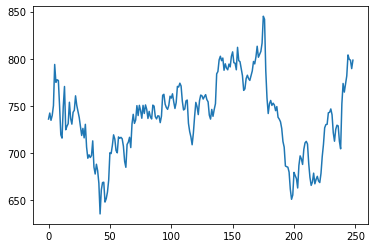

In [4]:
plt.plot(df1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

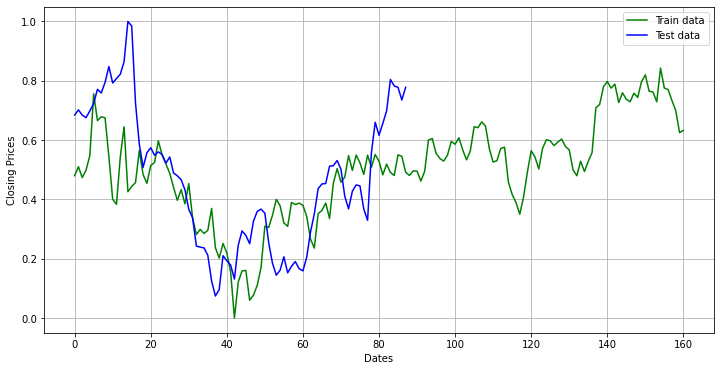

In [7]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [8]:
training_size,test_size

(161, 88)

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----10 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [10]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
print(X_train.shape), print(y_train.shape)

(150, 10)
(150,)


(None, None)

In [12]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [14]:
# LSTM MODEL
model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(LSTM(100, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))

model.add(LSTM(100, activation='relu', return_sequences=False))

model.add(Dense(50))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 126,301
Trainable params: 126,301
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 3s 202ms/step - loss: 0.2567 - val_loss: 0.1590
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 0.1624 - val_loss: 0.0838
Epoch 3/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0727 - val_loss: 0.0283
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0187 - val_loss: 0.0538
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0369 - val_loss: 0.0492
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0236 - val_loss: 0.0273
Epoch 7/100
3/3 [==============================] - 0s 37ms/step - loss: 0.0124 - val_loss: 0.0257
Epoch 8/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0161 - val_loss: 0.0274
Epoch 9/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0185 - val_loss: 0.0263
Epoch 10/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0161 - val_loss: 0.0245
Epoch 11/100
3/3 [

Epoch 84/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0058 - val_loss: 0.0108
Epoch 85/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0058 - val_loss: 0.0100
Epoch 86/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0058 - val_loss: 0.0099
Epoch 87/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0056 - val_loss: 0.0111
Epoch 88/100
3/3 [==============================] - 0s 39ms/step - loss: 0.0060 - val_loss: 0.0099
Epoch 89/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0057 - val_loss: 0.0101
Epoch 90/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0055 - val_loss: 0.0100
Epoch 91/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0052 - val_loss: 0.0098
Epoch 92/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0057 - val_loss: 0.0097
Epoch 93/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0053 - val_loss: 0.0098
Epoch 94/1

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict = np.array(train_predict).reshape(-1,1)
test_predict = np.array(test_predict).reshape(-1,1)


In [21]:
train_predict 

array([[0.64244986],
       [0.57716185],
       [0.4977084 ],
       [0.468231  ],
       [0.49621063],
       [0.4895257 ],
       [0.4812134 ],
       [0.4678176 ],
       [0.49311623],
       [0.50949126],
       [0.50254035],
       [0.5001129 ],
       [0.5059543 ],
       [0.537851  ],
       [0.5563246 ],
       [0.5534729 ],
       [0.5370434 ],
       [0.5061967 ],
       [0.47051   ],
       [0.44426018],
       [0.41333947],
       [0.41114822],
       [0.39065462],
       [0.35937297],
       [0.3272153 ],
       [0.30167034],
       [0.28927326],
       [0.3025441 ],
       [0.2923    ],
       [0.2707113 ],
       [0.25230742],
       [0.2418852 ],
       [0.21480735],
       [0.1573239 ],
       [0.11968758],
       [0.1059721 ],
       [0.11325008],
       [0.1267846 ],
       [0.1368488 ],
       [0.16493753],
       [0.23027638],
       [0.30133727],
       [0.3399385 ],
       [0.3413667 ],
       [0.37129518],
       [0.40036625],
       [0.41192615],
       [0.396

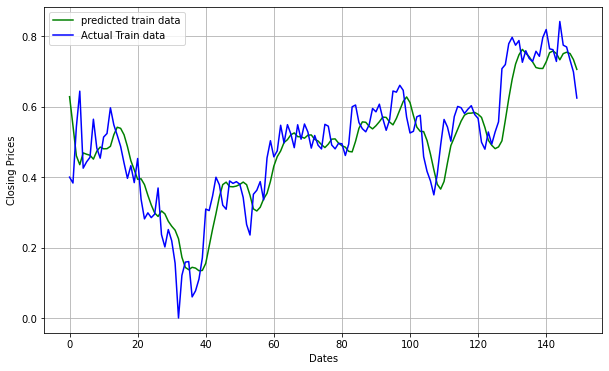

In [37]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_predict, 'green', label='predicted train data')
plt.plot(y_train, 'blue', label='Actual Train data')
plt.legend()

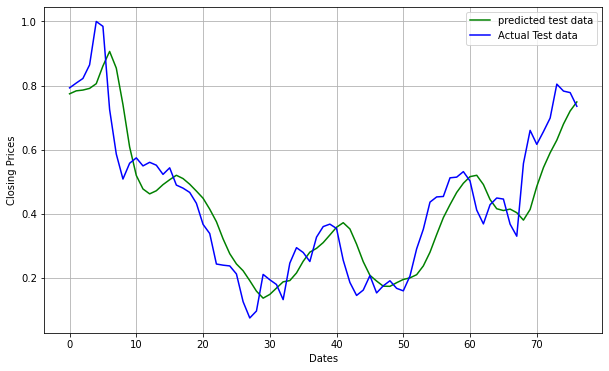

In [38]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_predict, 'green', label='predicted test data')
plt.plot(y_test, 'blue', label='Actual Test data')
plt.legend()

In [33]:
y_train = y_train.reshape(-1,1)
y_test = ytest.reshape(-1,1)
y_train.shape

(150, 1)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
train_predict.shape , y_train.shape

((150, 1), (150, 1))

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

737.1806603104372

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

724.99052604486

In [41]:
# ARIMA 
# ADF test
from statsmodels.tsa.stattools import adfuller

In [42]:
# check if data is stationary
# if p-value > 0.05 we will need to differencing
result = adfuller(df.Close.dropna())
print(f"ADF statistics: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistics: -2.4435028307047144
p-value: 0.1298324888452843


In [43]:
# choose no. of d
from pmdarima.arima.utils import ndiffs
ndiffs(df.Close, test="adf")

1

In [44]:
# partial autocorrelation function to choose p
from statsmodels.graphics.tsaplots import plot_pacf

diff =df.Close.diff().dropna()


C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


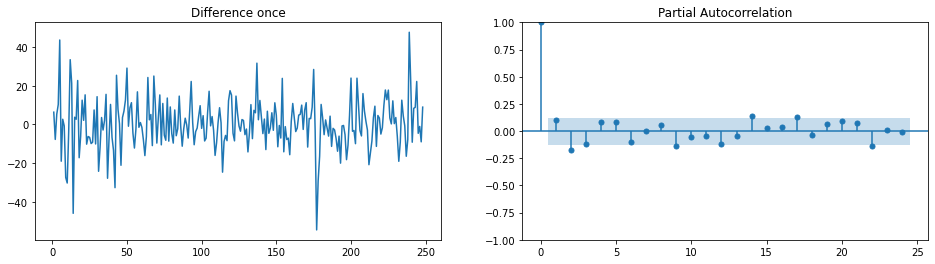

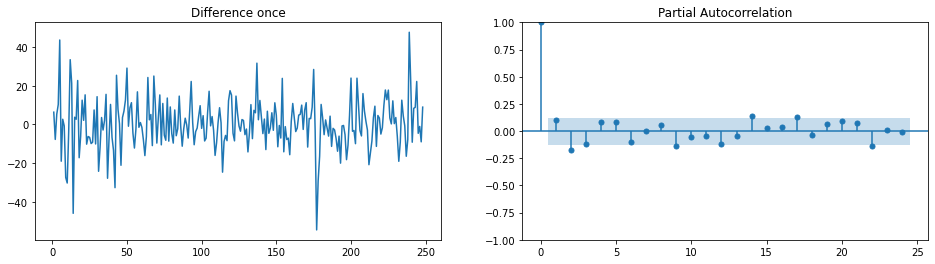

In [45]:
# p=14 above signifficant line, q=17
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2)

In [161]:
df_train = df[df.Date < "2022"]
df_valid = df[df.Date >= "2022"]
df_valid

,Date,Open,High,Low,Close,Adj Close,Volume
223,2022-01-03,680.250000,698.500000,679.000000,696.349976,696.349976,8550860
224,2022-01-04,701.000000,711.049988,700.049988,709.150024,709.150024,9705906
225,2022-01-05,711.900024,730.900024,707.750000,726.900024,726.900024,11312955
226,2022-01-06,719.950012,733.500000,719.000000,730.299988,730.299988,7955578
227,2022-01-07,734.000000,740.900024,725.250000,730.599976,730.599976,10454143
228,2022-01-10,733.650024,744.000000,733.200012,742.799988,742.799988,9595787
229,2022-01-11,742.900024,747.049988,737.299988,743.250000,743.250000,7252279
230,2022-01-12,749.650024,751.450012,743.150024,746.849976,746.849976,5294563
231,2022-01-13,749.000000,749.000000,737.049988,740.700012,740.700012,5196538
232,2022-01-14,734.799988,735.950012,716.049988,721.700012,721.700012,16302342


In [162]:
df_valid[['Open','High','Low','Close','Adj Close','Volume']] = scaler.fit_transform(df_valid[['Open','High','Low','Close','Adj Close','Volume']])
df_train[['Open','High','Low','Close','Adj Close','Volume']] = scaler.fit_transform(df_train[['Open','High','Low','Close','Adj Close','Volume']])

C:\Users\electromera\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\electromera\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [163]:
df_valid

,Date,Open,High,Low,Close,Adj Close,Volume
223,2022-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.101981
224,2022-01-04,0.169734,0.110670,0.184568,0.118794,0.118794,0.137098
225,2022-01-05,0.258896,0.285714,0.252082,0.283527,0.283527,0.185957
226,2022-01-06,0.324744,0.308642,0.350723,0.315081,0.315081,0.083883
227,2022-01-07,0.439673,0.373898,0.405524,0.317865,0.317865,0.159846
228,2022-01-10,0.436810,0.401234,0.475230,0.431091,0.431091,0.133750
229,2022-01-11,0.512475,0.428130,0.511179,0.435267,0.435267,0.062500
230,2022-01-12,0.567689,0.466931,0.562473,0.468677,0.468677,0.002980
231,2022-01-13,0.562372,0.445326,0.508987,0.411601,0.411601,0.000000
232,2022-01-14,0.446217,0.330247,0.324857,0.235267,0.235267,0.337648


In [164]:
df_valid.shape 

(26, 7)

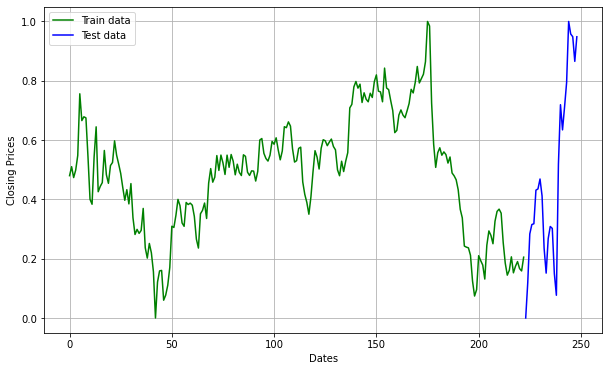

In [165]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_train.Close, 'green', label='Train data')
plt.plot(df_valid.Close, 'blue', label='Test data')
plt.legend()

In [166]:
# ARIMA MODEL
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train['Close'], order=(14,1,17))
result = model.fit()

C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\electromera\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [167]:
start = len(df_train)
end = len(df_train + df_valid)-1

In [168]:
pred = result.predict(start=start, end=end, dynamic=False)
pred = pd.DataFrame(pred)
pred

,predicted_mean
223,0.250586
224,0.271376
225,0.265716
226,0.260264
227,0.247971
228,0.222738
229,0.219735
230,0.238478
231,0.220725
232,0.206348


In [169]:
df1=pd.concat([df_valid.Date , df_valid.Close , pred], axis=1)
df1

,Date,Close,predicted_mean
223,2022-01-03,0.000000,0.250586
224,2022-01-04,0.118794,0.271376
225,2022-01-05,0.283527,0.265716
226,2022-01-06,0.315081,0.260264
227,2022-01-07,0.317865,0.247971
228,2022-01-10,0.431091,0.222738
229,2022-01-11,0.435267,0.219735
230,2022-01-12,0.468677,0.238478
231,2022-01-13,0.411601,0.220725
232,2022-01-14,0.235267,0.206348


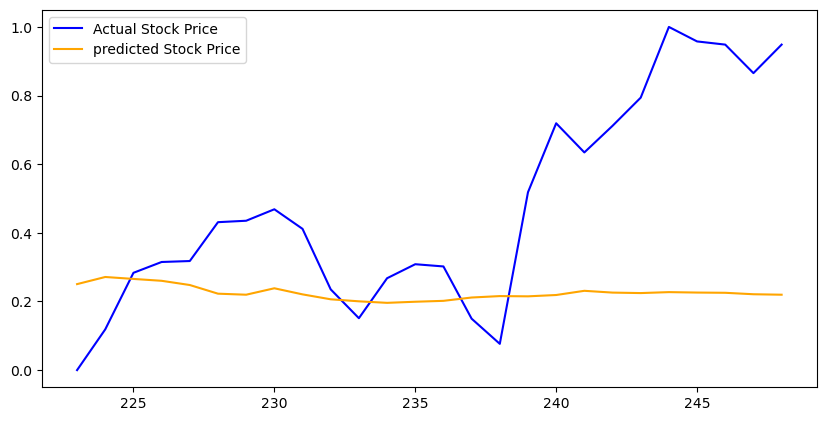

In [170]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_valid.Close, color = 'blue', label='Actual Stock Price')
plt.plot(pred, color = 'orange', label='predicted Stock Price')
plt.legend()
plt.show()

In [39]:
fc = result.forecast()
fc

223    0.250586
dtype: float64

In [171]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(df_valid.Close, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(df_valid.Close, pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(df_valid.Close, pred))
print('RMSE: '+str(rmse))


MSE: 0.1536325434596986
MAE: 0.3005404276935393
RMSE: 0.39195987480824945
